## Analyze A/B Test Results
-------------------------

    
|   * * * * * * * * * *   | **Udacity**         | 
| -------------           |:-------------:      |
| **Nanodegree:**         | *Data Analyst*    | 
| **Student:**            | *Theresa Kocher*    |
| **Date:**               | *3rd February 2019*  |



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
rows = df.shape[0]

rows

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = df['user_id'].nunique()

unique_users

290584

d. The proportion of users converted.

In [5]:
proportion_converted = df['converted'].sum() / rows

proportion_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df_treatment = df.query('group == "treatment"')
df_new_page = df.query('landing_page == "new_page"')

df_treatment_not_new_page = df_treatment.query('landing_page != "new_page"')
df_new_page_not_treatment = df_new_page.query('group != "treatment"')

number_1 = df_treatment_not_new_page.shape[0]
number_2 = df_new_page_not_treatment.shape[0]

number_no_matches = number_1 + number_2

number_no_matches 

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df_broken = df_treatment_not_new_page.append(df_new_page_not_treatment)
df_broken.shape[0]

3893

In [10]:
df2 = df[~df.isin(df_broken)].dropna()

df2.shape[0]

290585

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2['is_duplicated'] = df2['user_id'].duplicated()

df3 = df2.query('is_duplicated == True')

user = df2[df2['is_duplicated']==True]['user_id']

user

2893    773192.0
Name: user_id, dtype: float64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['is_duplicated']]

,user_id,timestamp,group,landing_page,converted,is_duplicated
2893,773192.0,2017-01-14 02:55:59.590927,treatment,new_page,0.0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(['user_id'])
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
prob_regardlessOfPage = df2['converted'].mean()
prob_regardlessOfPage

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_control = df2.query('group == "control"')['converted'].mean()

prob_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_treatment = df2.query('group == "treatment"')['converted'].mean()

prob_treatment

0.11880806551510564

In [19]:
diff = prob_treatment - prob_control

diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [20]:
number_new_page = df2.query('landing_page == "new_page"').shape[0]
number_total = df2.shape[0]
prob_new_page = number_new_page / number_total

prob_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [21]:
df2['timestamp'].min(), df2['timestamp'].max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

<span style="color:blue">Almost half of the users received the new page. The other half received the old page. All in all, data of 290584 individual users were recorded inbetween a timeframe of 22 days.</span> <br>

<span style="color:blue">Since the difference in the converting probability between the new page and the old page is only 0.16% with an advantage for the old page, the rejection of the null hypothesis failed. There is no sufficient evidence that the new treatment page leads to more conversions.</span>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


<span style="color:blue">*H_0:* p_old >= p_new </span>

<span style="color:blue">*H_1:* p_old < p_new </span>



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [22]:
# assumption: p_new and p_old are the same:
prob_regardlessOfPage

0.11959708724499628

In [23]:
# observed difference in the original sample data
observed_p_new = df.query('group =="treatment"')['converted'].mean()
observed_p_old = df.query('group =="control"')['converted'].mean()
observed_diff = observed_p_new - observed_p_old

observed_diff

-0.0014795997940775518

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new_under_H_null = prob_regardlessOfPage
p_new_under_H_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old_under_H_null = prob_regardlessOfPage
p_old_under_H_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query('group =="treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query('group =="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.choice(2, n_new, p=[1-p_new_under_H_null, p_new_under_H_null])
new_page_converted.mean()

0.12034271557360127

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice(2, n_old, p=[1-p_old_under_H_null, p_old_under_H_null])
old_page_converted.mean()

0.11998705893690544

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
simulated_diff_under_H_null = new_page_converted.mean() - old_page_converted.mean()
simulated_diff_under_H_null

0.0003556566366958308

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
prob_new = p_new_under_H_null
prob_old = p_old_under_H_null

p_diffs = []

for _ in range(10000):
    #sample = df.sample(df.shape[0], replace=True)
    new_page_converted = np.random.choice(2, n_new, p=[1-prob_new, prob_new])
    p_new = new_page_converted.mean()    
    
    old_page_converted = np.random.choice(2, n_old, p=[1-prob_old, prob_old])
    p_old = old_page_converted.mean()
    
    p_diffs.append(p_new - p_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [32]:
p_diffs = np.array(p_diffs)
p_diffs.mean(), p_diffs.std()

(9.677082789914017e-06, 0.0011989821188515125)

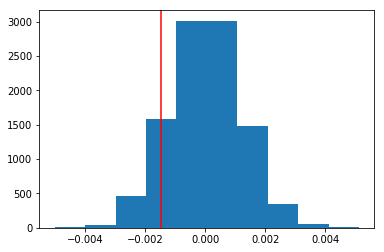

In [33]:
# sampling distribution
plt.hist(p_diffs);
plt.axvline(observed_diff, c='red');

In [34]:
# estimate from the null hypothesis with the standard derivation from the sampling distribution
#h0_sampling_distr = np.random.normal(0, p_diff.std(), df2.shape[0])

#plt.hist(h0_converted_distr);
#plt.axvline(observed_diff, c='red');

# p-value
#(h0_sampling_distr < observed_diff).mean()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# p-value
#(p_diffs > np.abs(observed_diff)).mean()
(p_diffs < observed_diff).mean()

0.1104

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color:blue">The **p-value** of the observed conversion difference is 0.1054.</span>

<span style="color:blue">Since this **p-value** is above the **significance level** *alpha=0.05%*, this variable is **not statistically significant**. Because it is possible that the convertion difference (between A/B Test) in the observed sample can come from the null distribution.</span>

<span style="color:blue">That's why we **failed to reject the null hypothesis**. Thus, we can't assume there is a different between old and new page.</span>



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm
from pandas.core import datetools

convert_old = df.query('group == "control" and converted == True').shape[0]
convert_new = df.query('group == "treatment" and converted == True').shape[0]
n_old = df.query('group == "control"').shape[0]
n_new = df.query('group == "treatment"').shape[0]

print("old: ", convert_old, "/", n_old)
print("new: ", convert_new, "/", n_new)

old:  17723 / 147202
new:  17514 / 147276


/anaconda3/envs/dataSciConda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

z_score, p_value

(1.2369217547321678, 0.21611613269757501)

In [38]:
# significance
p_value < 0.05

False

In [39]:
from scipy.stats import norm

z_score_significance = norm.cdf(z_score) # Tells us how significant our z-score is
critical_value = norm.ppf(1-(0.05/2)) # Tells us what our critical value at 95% confidence is

print(z_score_significance, critical_value)

0.8919419336512124 1.959963984540054


In [40]:
# significance
z_score_significance > critical_value

False

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color:blue">

Both, the z-score and the p-value show that there is **no significant difference** between conversion rate of the old and the new page.

Even if the thus (with scipy.stats) computed **p-value** is *not the same* as the above computed (with simulating diffs with numpy), both **p-values** lead to the *same result*.

</span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color:blue">Linear regression.</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2['intercept'] = 1

df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])

In [42]:
df2 = df2.drop(['a_page'], axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0,False,1,0
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0,False,1,0
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0,False,1,1
3,853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0,False,1,1
4,864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0,False,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
#lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sat, 09 Feb 2019   Prob (F-statistic):              0.190
Time:                        16:57:54   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

<span style="color:blue">The p-value associated with ab_page is 0.19.</span>

<span style="color:blue">The p-values of the linear regression results and of the computation from Part II differ, because both methods assume another null hypothesis.</span>

<span style="color:blue">**linear regression** (Part III)</span>

<span style="color:blue">H_0: coefficient *b1 = 0* in the equation: y = b1\*x + b0
- where y is the predicted convertion,
- b1 the coefficient of the ab_page
- and b0 is the coefficient of the intercept)</span>

<span style="color:blue">H_1: coefficient *b1 != 0* </span>



<span style="color:blue">**simulation from sampling distribution** (Part II)</span>

<span style="color:blue">H_0: proportional difference *p_new - p_old = 0* </span>

<span style="color:blue">H_1: proportional difference *p_new - p_old != 0* </span>


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:blue">***other factors:***
If we had more information about the users, we can compute the statistically significancy for those addiotional features. For instance: the **age** of the user, the **country** of the user or the used **browser** or even the **day time** in which the user interacts.</span>

<span style="color:blue">***discuss this idea:***
Maybe some other factors show us that there are more significant features than the old or new page to predict if a user converts.</span>

<span style="color:blue">Or maybe it shows us if the old or new page is more significant in some countries than in others, or by young/old users. These results could help us to optimize our page selection with regard to the target group (set of users).</span>

<span style="color:blue">Or maybe it even shows us that the old or new page is more significant in some specific browsers. The last results could help us to optimize our technical solution of the page with regard to the browser environment.</span>

<span style="color:blue">It would be interessting to know if the conversion rate depends on the day time of the interaction.</span>

<span style="color:blue">***disadvantages:***</span>

<span style="color:blue">1. The explanatory variables **country** and **browser** are categorical variables and dummy variables need to be used.</span>

<span style="color:blue">2. **Multicollinearity:** The multiple linear regression can make the interpretation of results more complex. Especially, if some explanatory variables are correlated the single coefficients of the variables won't tell us all information about the correlation of this explanatory variable and the response variable. To make the interpretation of the information from the regression model more easy, it is necessary to remove the correlated variables.</span>

<span style="color:blue">3. Sometimes the linear mutliple linear regression won't help to predict a response variable. Sometimes a more complex function is helpfull to get better predictions. Therefor **interactions** between features can be used to add to the model and this makes the regression function non-linear.</span>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - Provide the statistical output as well as a written response to answer this question.

In [45]:
df_countries = pd.read_csv('data/countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df2['user_id'] = df2['user_id'].astype(int)

In [47]:
df2 = df2.set_index('user_id').join(df_countries.set_index('user_id'))

In [48]:
df2['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [49]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.drop(['CA'], axis=1)
df2.head(10)

,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0.0,False,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0.0,False,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0,False,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0,False,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1.0,False,1,0,US,0,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0.0,False,1,0,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1.0,False,1,1,CA,1,0,0
719014,2017-01-17 01:48:29.539573,control,old_page,0.0,False,1,0,US,0,0,1
817355,2017-01-04 17:58:08.979471,treatment,new_page,1.0,False,1,1,UK,0,1,0


In [50]:
# multiple linear regression model
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page', 'US', 'UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 09 Feb 2019   Prob (F-statistic):              0.178
Time:                        16:57:54   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
US             0.0042      0.003      1.514      0.130      -0.001       0.010
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">The **conversion rate in the following countries** is in average:
- CA: 0.1161
- US: 0.1161 + 0.0042 = 0.1203
- UK: 0.1161 + 0.0053	= 0.1214</span>

<span style="color:blue">The **conversion rate on the appropriate page** is in average:
- old page: 0.1161
- new page: 0.1161 - 0.0016	= 0.1145</span>


<span style="color:blue">with the following **p-values**</span>
    
<span style="color:blue">p_page = 0.191</span>

<span style="color:blue">p_US = 0.130</span>

<span style="color:blue">p_UK = 0.074</span>

<span style="color:blue">It seems like the *country* has a little bit more influence to the conversion than the *ab_page*.</span>

<span style="color:blue">But non of the explanatory variables has a linear correlation to the responsing variable. Which we can see in the R-squared value = 0.</span>


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df2['US_page'] = df2['US'] * df2['ab_page']
df2['UK_page'] = df2['UK'] * df2['ab_page']
df2.head()

,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page,country,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0.0,False,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0.0,False,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0,False,1,1,US,0,0,1,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0,False,1,1,US,0,0,1,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1.0,False,1,0,US,0,0,1,0,0


In [52]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page', 'US', 'UK', 'US_page', 'UK_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Sat, 09 Feb 2019   Prob (F-statistic):              0.197
Time:                        16:57:55   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
US             0.0018      0.004      0.467      0.641      -0.006       0.010
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
US_page        0.0047      0.006      0.845      0.398      -0.006       0.016
UK_page        0.0080      0.006      1.360      0.174      -0.004       0.020
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">The interaction doesn't help to predict the consideration value better. The ***R-squared** value is still 0.</span>

<span style="color:blue">But let's try out, if the assigned group (page version) depends on the located country.</span>


#### i. Explore dependencies between country and page version

In [53]:
lm = sm.OLS(df2['ab_page'], df2[['intercept', 'converted', 'US', 'UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ab_page   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.166
Date:                Sat, 09 Feb 2019   Prob (F-statistic):              0.321
Time:                        16:57:55   Log-Likelihood:            -2.1090e+05
No. Observations:              290584   AIC:                         4.218e+05
Df Residuals:                  290580   BIC:                         4.219e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5040      0.004    120.990      0.000       0.496       0.512
converted     -0.0037      0.003     -1.307      0.191      -0.009       0.002
US            -0.0031      0.004     -0.716      0.474      -0.012       0.005
UK            -0.0053      0.005     -1.162      0.245      -0.014       0.004
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.999   Jarque-Bera (JB):            48428.335
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         9.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">There is no linear correlation, as the **R-squared** is 0.</span>


<span style="color:blue">Let's try to convert the timestamp from datetime to daytimes between 0 and 24 o'clock. And let's see if this additional explanatory variable helps to predict the conversion value.</span>


#### j. Consider time

<span style="color:blue">Let's try to convert the timestamp from datetime to daytimes between 0 and 24 o'clock. And let's see if this additional explanatory variable helps to predict the conversion value.</span>

In [54]:
# time interval
df_time = pd.to_datetime(df2['timestamp'])
df_time.min(), df_time.max()

(Timestamp('2017-01-02 13:42:05.378582'),
 Timestamp('2017-01-24 13:41:54.460509'))

In [55]:
# cut timestamp to day time
df2['timestamp'] = df2['timestamp'].map(lambda x: str(x)[11:13])

In [56]:
df2['timestamp'] = pd.to_numeric(df2['timestamp'])
df2['timestamp'].head(4)

user_id
851104    22
804228     8
661590    16
853541    18
Name: timestamp, dtype: int64

In [57]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page', 'US', 'UK', 'timestamp']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.010
Date:                Sat, 09 Feb 2019   Prob (F-statistic):             0.0171
Time:                        16:57:56   Log-Likelihood:                -85262.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1134      0.003     38.629      0.000       0.108       0.119
ab_page       -0.0016      0.001     -1.305      0.192      -0.004       0.001
US             0.0042      0.003      1.510      0.131      -0.001       0.010
UK             0.0053      0.003      1.783      0.075      -0.001       0.011
timestamp      0.0002    8.7e-05      2.669      0.008    6.17e-05       0.000
==============================================================================
Omnibus:                   125546.113   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414263.438
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">The **R-squared** value is still 0. So there is **no linear correlation** when considering the day time from 0 to 23 o'clock even if the **p-value** of the time variable is only 0.008.</span>

<a id='conclusions'></a>
## Conclusion


### Statistical reasoning:

<span style="color:blue">Either the **country** nor the **time**, nor a combination of **country and page** is a significant variable to predict the conversion value. They are all independent variables. (***Part III***)</span>

<span style="color:blue">Also the **page** - as we already saw in the A/B-test above - has no significant influence to the conversion prediction. (***Part II + III***)</span>

<span style="color:blue">As a result of the A/B-test (***Part II***), we failed to reject the null hypothesis. As a result of an AB test of the page version, the new page doesn't lead to more conversions.</span>


### Practical reasoning:

<span style="color:blue">If a user convert on the page or not, does not change with **day time**. Also in different **countries** there is **no different conversion** behaviour. We expect from all users **independent from country, time and assigned page** to convert the same. Everywhere, everytime and on every page version is the **same contribution value expected**.</span>


In [58]:
# used packages and versions
# source to print used packages and versions: https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.9.0
pandas==0.23.4
numpy==1.15.4
matplotlib==3.0.2


In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0